# Estudo sobre Reports do mercado financeiro
# Instalação de bibliotecas
## pip install mpcyberpunk
## pip install pandas



In [30]:
import win32com
#Importação das bibliotecas
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

# Pegar as cotações historicas


In [31]:
tickers = ["^BVSP", "^GSPC", "BRL=X"]
dados_mercado = yf.download(tickers, period="6mo")
dados_mercado = dados_mercado["Adj Close"]
dados_mercado


[*********************100%***********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.00000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.00000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.00000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.00000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.00000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.00000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.00000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.00000,5408.419922


## Tratamento de dados coletados


In [32]:
dados_mercado = dados_mercado.dropna()
dados_mercado

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.00000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.00000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.00000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.00000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.00000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.00000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.00000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.00000,5408.419922


In [33]:
dados_mercado.columns = ["DOLLAR", "IBOVESPA", "S&P500"]

In [34]:
dados_mercado

,DOLLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.00000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.00000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.00000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.00000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.00000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.00000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.00000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.00000,5408.419922


## Criar graficos de performace


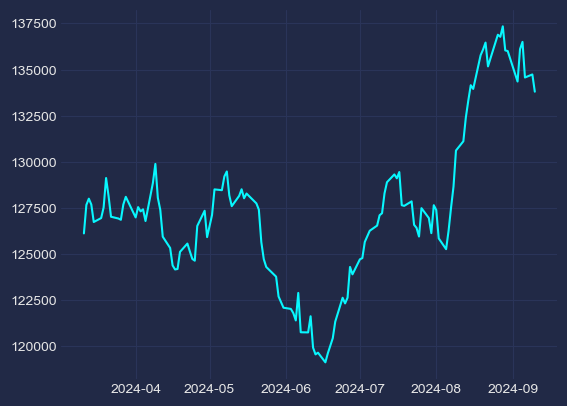

In [35]:
plt.style.use("cyberpunk")
plt.plot(dados_mercado["IBOVESPA"])
plt.savefig('ibovespa.png')

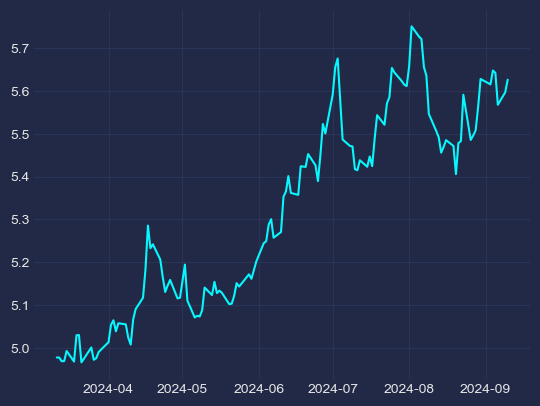

In [36]:
plt.style.use("cyberpunk")
plt.plot(dados_mercado["DOLLAR"])
plt.savefig('dollar.png')

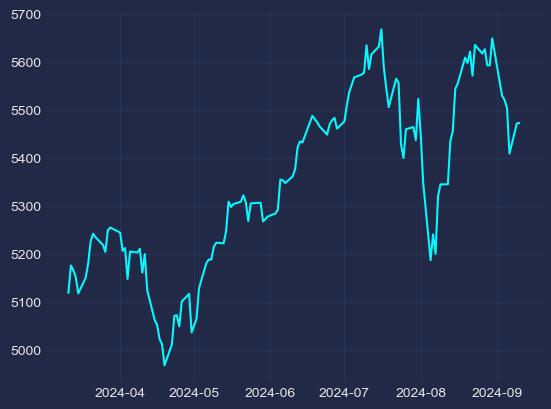

In [37]:
plt.style.use("cyberpunk")
plt.plot(dados_mercado["S&P500"])
plt.savefig('sp500.png')

## Calculo de dados diarios


In [38]:
retorno_diarios = dados_mercado.pct_change()
retorno_diarios

,DOLLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,NaN,NaN,NaN
2024-03-12 00:00:00+00:00,-0.000028,0.012242,0.011202
2024-03-13 00:00:00+00:00,-0.001748,0.002647,-0.001925
2024-03-14 00:00:00+00:00,0.000101,-0.002469,-0.002871
2024-03-15 00:00:00+00:00,0.004729,-0.007424,-0.006483
...,...,...,...
2024-09-04 00:00:00+00:00,0.005770,0.013085,-0.001603
2024-09-05 00:00:00+00:00,-0.000974,0.002873,-0.003018
2024-09-06 00:00:00+00:00,-0.013205,-0.014139,-0.017260


In [39]:
retorno_dollar= retorno_diarios["DOLLAR"].iloc[-1]
retorno_ibovespa = retorno_diarios["IBOVESPA"].iloc[-1]
retorno_sp500= retorno_diarios["S&P500"].iloc[-1]


In [40]:
retorno_dollar = str(round(retorno_dollar * 100, 2)) + "%"
retorno_ibovespa = str(round(retorno_ibovespa * 100, 2)) + "%"
retorno_sp500 = str(round(retorno_sp500 * 100, 2)) + "%"

# Enviando email 


In [41]:
import win32com.client as win32 

In [46]:
outlook = win32.Dispatch("Outlook.Application")
email = outlook.CreateItem(0)
email.To = "evento@varos.com.br"
#email.To = "pu4paf@gmail.com"
email.Subject = "Relatório de Mercado"
email.Body = f'''Prezado diretor, segue o relatório de mercado:

* O Ibovespa teve o retorno de {retorno_ibovespa}.
* O Dólar teve o retorno de {retorno_dollar}.
* O S&P500 teve o retorno de {retorno_sp500}.

Segue em anexo a peformance dos ativos nos últimos 6 meses.

Att,
Melhor estagiário do mundo


'''

anexo_ibovespa = r"C:\laragon\www\Python\relatorio_mercado\ibovespa.png"
anexo_sp500 = r"C:\laragon\www\Python\relatorio_mercado\sp500.png"
anexo_dollar = r"C:\laragon\www\Python\relatorio_mercado\dollar.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_sp500)
email.Attachments.Add(anexo_dollar)
email.Send()